# KNN Classifier

# Step 1: Import Libraries

In [1]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Define Constants and Helper Functions

In [2]:
TEST_SIZE = 0.2

def load_data(filename):
    evidence = []
    labels = []

    month_index = dict(Jan=0, Feb=1, Mar=2, Apr=3, May=4, June=5,
                       Jul=6, Aug=7, Sep=8, Oct=9, Nov=10, Dec=11)

    with open(filename) as f:
        reader = csv.DictReader(f)

        for row in reader:
            evidence.append([
                int(row["Administrative"]),
                float(row["Administrative_Duration"]),
                int(row["Informational"]),
                float(row["Informational_Duration"]),
                int(row["ProductRelated"]),
                float(row["ProductRelated_Duration"]),
                float(row["BounceRates"]),
                float(row["ExitRates"]),
                float(row["PageValues"]),
                float(row["SpecialDay"]),
                month_index[row["Month"]],
                int(row["OperatingSystems"]),
                int(row["Browser"]),
                int(row["Region"]),
                int(row["TrafficType"]),
                1 if row["VisitorType"] == "Returning_Visitor" else 0,
                1 if row["Weekend"] == "TRUE" else 0,
            ])

            labels.append(1 if row["Revenue"] == "TRUE" else 0)

    return evidence, labels

def train_model(evidence, labels):
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(evidence, labels)
    return model

def evaluate(labels, predictions):
    t_positive = float(0)
    t_negative = float(0)
    sensitivity = float(0)
    specificity = float(0)

    for label, prediction in zip(labels, predictions):
        if label == 0:
            t_negative += 1
            if label == prediction:
                specificity += 1

        if label == 1:
            t_positive += 1
            if label == prediction:
                sensitivity += 1

    sensitivity /= t_positive
    specificity /= t_negative

    return sensitivity, specificity


# Step 3: Load Data


In [3]:
# Replace 'Data/activity_data.csv' with the path to your CSV file
filename = 'activity_data.csv'

evidence, labels = load_data(filename)


# Step 4: Split Data into Training and Testing Sets


In [4]:
X_train, X_test, y_train, y_test = train_test_split(evidence, labels, test_size=TEST_SIZE)

# Step 5: Train the Model and Make Predictions


In [5]:
model = train_model(X_train, y_train)
predictions = model.predict(X_test)
sensitivity, specificity = evaluate(y_test, predictions)

# Step 6: Evaluate the Model


In [6]:
print(f"Correct: {(y_test == predictions).sum()}")
print(f"Incorrect: {(y_test != predictions).sum()}")
print(f"True Positive Rate: {100 * sensitivity:.2f}%")
print(f"True Negative Rate: {100 * specificity:.2f}%")

print("\nClassification Report\n")
print(classification_report(y_test, predictions))
print("Accuracy : ", accuracy_score(y_test, predictions) * 100)

Correct: 2019
Incorrect: 447
True Positive Rate: 34.04%
True Negative Rate: 90.48%

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2090
           1       0.39      0.34      0.36       376

    accuracy                           0.82      2466
   macro avg       0.64      0.62      0.63      2466
weighted avg       0.81      0.82      0.81      2466

Accuracy :  81.8734793187348


# Step 7: Visualizing Results

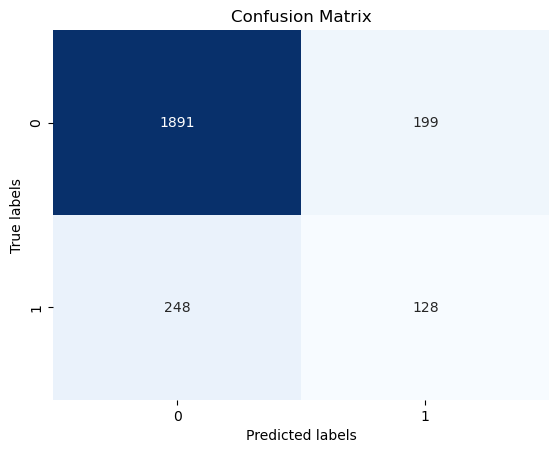

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, predictions)


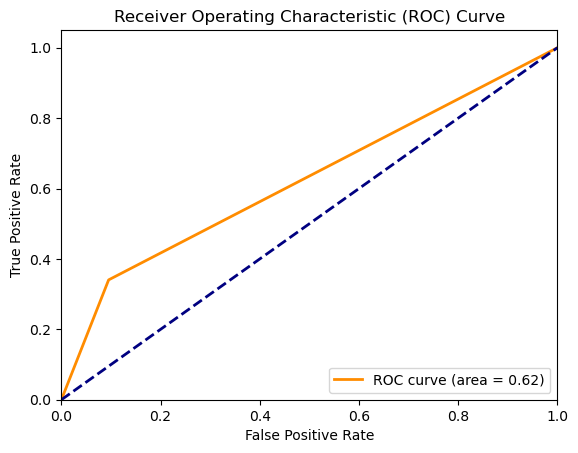

In [8]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, predictions):
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, predictions)


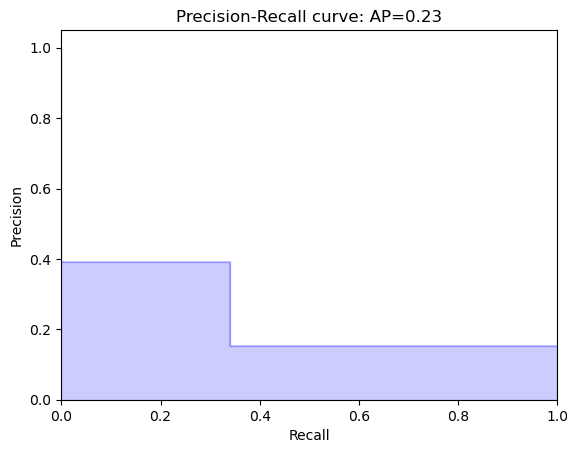

In [9]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(y_test, predictions):
    precision, recall, _ = precision_recall_curve(y_test, predictions)
    average_precision = average_precision_score(y_test, predictions)

    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

plot_precision_recall_curve(y_test, predictions)
